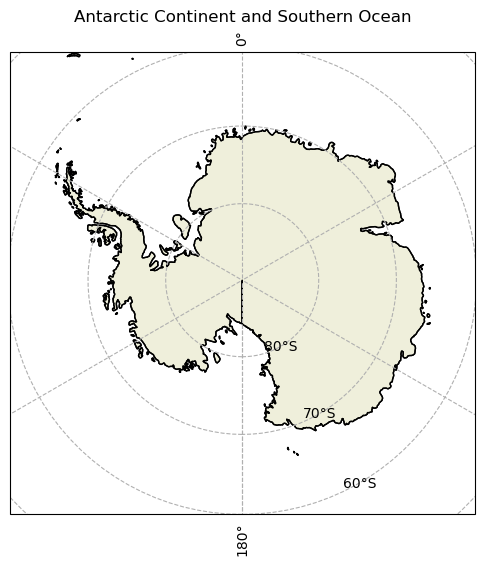

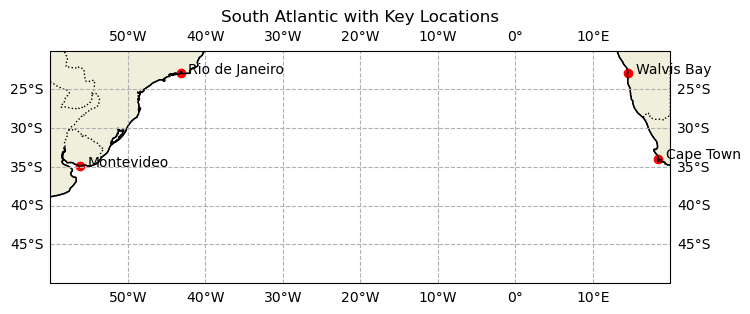

In [7]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

# Function to create a map
def create_map(projection, extent, title, locations=None):
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': projection})
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    
    # Add features
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE) # for the coastline
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.gridlines(draw_labels=True, linestyle='--')
    
    # Add locations if provided
    if locations:
        for city, (lon, lat) in locations.items():
            ax.scatter(lon, lat, color='red', transform=ccrs.PlateCarree())
            ax.text(lon + 1, lat, city, transform=ccrs.PlateCarree(), fontsize=10)
    
    ax.set_title(title)
    plt.show()

# 1. Antarctic Continent and Southern Ocean (from 60°S)
antarctic_proj = ccrs.SouthPolarStereo()
antarctic_extent = [-180, 180, -90, -60]
create_map(antarctic_proj, antarctic_extent, "Antarctic Continent and Southern Ocean")

# 2. South Atlantic with key locations
south_atlantic_proj = ccrs.PlateCarree()
south_atlantic_extent = [-60, 20, -50, -20]
cities = {'Walvis Bay': (14.5, -22.95), 'Cape Town': (18.42, -33.93),
          'Rio de Janeiro': (-43.2, -22.9), 'Montevideo': (-56.17, -34.9)}
create_map(south_atlantic_proj, south_atlantic_extent, "South Atlantic with Key Locations", locations=cities)



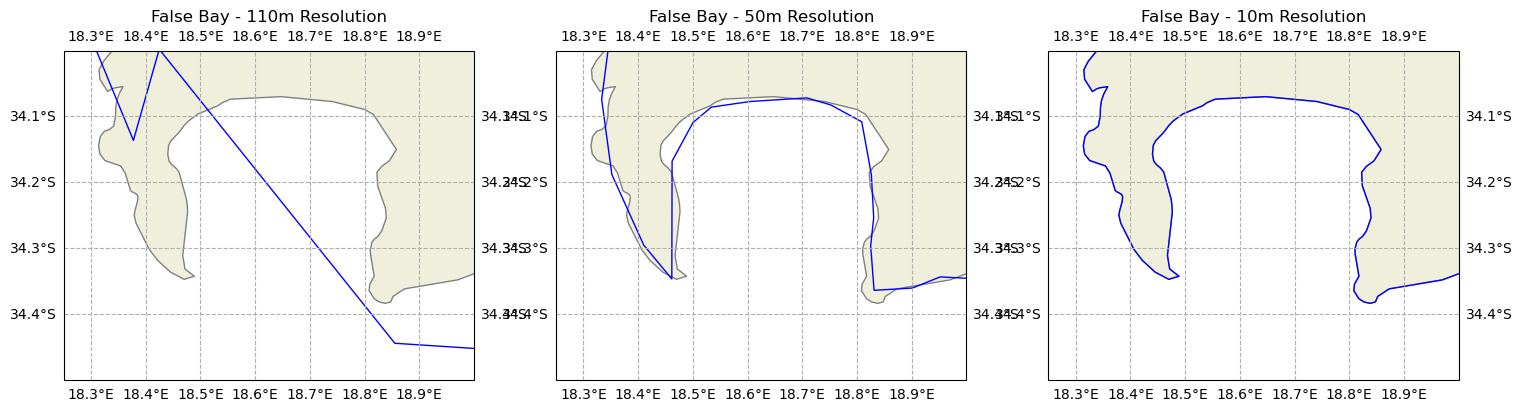

In [23]:
# 3. False Bay with different coastline resolutions
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

resolutions = ["110m", "50m", "10m"]  # GSHHG resolution keys
fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': ccrs.Mercator()})
false_bay_extent = [18.25, 19.0, -34.5, -34.0]

for ax, res in zip(axes, resolutions):
    ax.set_extent(false_bay_extent, crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, edgecolor='grey')
    ax.add_feature(cfeature.COASTLINE.with_scale(res), edgecolor='blue')
    ax.gridlines(draw_labels=True, linestyle='--')
    ax.set_title(f"False Bay - {res} Resolution")
plt.show()